## Домашнее задание к лекции "Визуализация данных"
### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

* данные приложений из Google Play;
* данные о видео из трендов YouTube;
* данные об уровне счастья в разных странах;
* данные по фильмам и сериалам Netflix.

### Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
rest_df = pd.read_csv('one-star-michelin-restaurants.csv')
# print('region are:',rest_df.region.unique())
#print('city are:',rest_df.city.unique())
print('cuisine are:',rest_df.cuisine.unique())

cuisine are: ['Creative' 'Classic cuisine' 'Market cuisine' 'Modern cuisine' 'Japanese'
 'Vegetarian' 'Contemporary' 'Indian' 'Korean' 'Californian' 'American'
 'International' 'Moroccan' 'Thai' 'Chinese' 'Fusion' 'Italian' 'French'
 'Asian' 'Steakhouse' 'Mexican' 'Gastropub' 'Danish' 'Classic French'
 'Finnish' 'Mediterranean' 'Seafood' 'Cantonese' 'Dim Sum' 'Teppanyaki'
 'Sushi' 'Shanghainese' 'Noodles and congee' 'Innovative'
 'Cantonese Roast Meats' 'Taizhou' 'Sichuan' 'European contemporary'
 'Scandinavian' 'Austrian' 'Spanish' 'Modern British' 'modern'
 'Asian influences' 'creative' 'French contemporary' 'Korean contemporary'
 'Temple cuisine' 'Street Food' 'Fujian' 'Australian'
 'Italian contemporary' 'Barbecue' 'Peranakan' 'Meats and grills'
 'Taiwanese' 'Hang Zhou' 'Asian contemporary' 'Thai Contemporary'
 'Southern Thai' 'European' 'Creative British' 'Traditional British'
 'Regional cuisine' 'Mediterranean cuisine' 'Creative French'
 'Modern French']


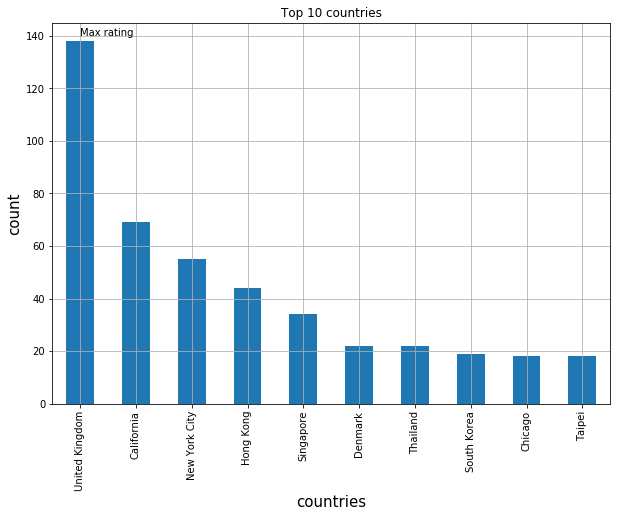

In [4]:
regplt=rest_df.region.value_counts()[:10].plot.bar(title='Top 10 countries')
regplt.set_xlabel('countries',size=15)
regplt.set_ylabel('count',size=15)
regplt.text(0, 140, 'Max rating')
regplt.grid()
regplt
# Топ-10 стран по кол-ву мишленовских ресторанов (с одной звездой). Лидирует UK (138 ресторанов). 

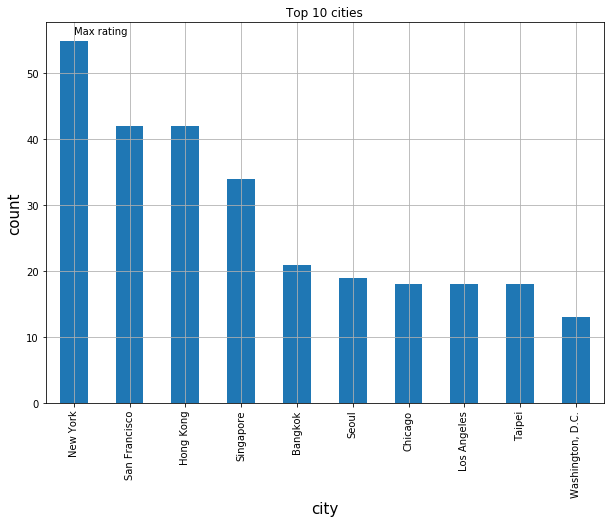

In [5]:
cityplt=rest_df.city.value_counts()[:10].plot.bar(title='Top 10 cities')
cityplt.set_xlabel('city',size=15)
cityplt.set_ylabel('count',size=15)
cityplt.text(0, 56, 'Max rating')
cityplt.grid()
cityplt
# Топ-10 городов по кол-ву мишленовских ресторанов (с одной звездой). Лидирует NYK. Около 55 ресторанов. 
# Гонконг и Сан-Франциско на 2-м месте.

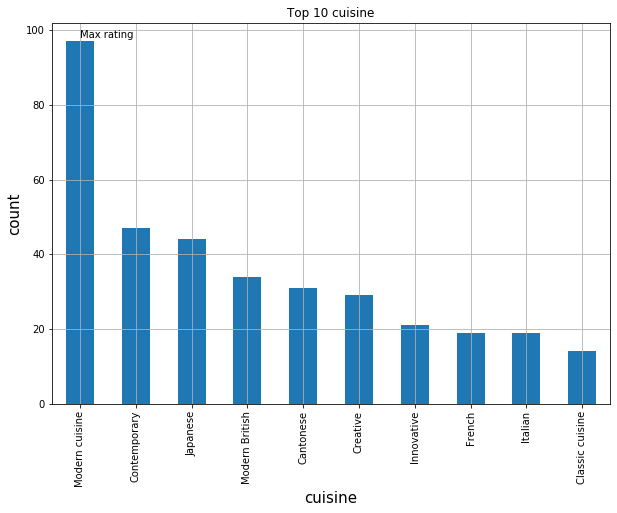

In [6]:
cuis_plt=rest_df.cuisine.value_counts()[:10].plot.bar(title='Top 10 cuisine')
cuis_plt.set_xlabel('cuisine',size=15)
cuis_plt.set_ylabel('count',size=15)
cuis_plt.text(0, 98, 'Max rating')
cuis_plt.grid()
cuis_plt
# Топ-10 мировых кухонь представленных в мишленовских ресторанах (с одной звездой). В лидирах Modern Cuisine.

### Далее попробовал визуализировать гистограмму с накоплением, но она не получилась.
### Тепловая карта не подходит, как инструмент визуализации.

In [7]:
rest_df = pd.read_csv('one-star-michelin-restaurants.csv')
reg_cuis = rest_df.loc[:, ['region', 'cuisine']]
reg_cuis.head()
# rest_df


,region,cuisine
0,Austria,Creative
1,Austria,Classic cuisine
2,Austria,Creative
3,Austria,Market cuisine
4,Austria,Modern cuisine


In [8]:
svod = reg_cuis.groupby('region').agg(['value_counts'])['cuisine'].reset_index()
svod

,region,cuisine,value_counts
0,Austria,Classic cuisine,3
1,Austria,Creative,3
2,Austria,Modern cuisine,3
3,Austria,Japanese,1
4,Austria,Market cuisine,1
...,...,...,...
172,Washington DC,Italian,2
173,Washington DC,European,1
174,Washington DC,Japanese,1
175,Washington DC,Mediterranean,1


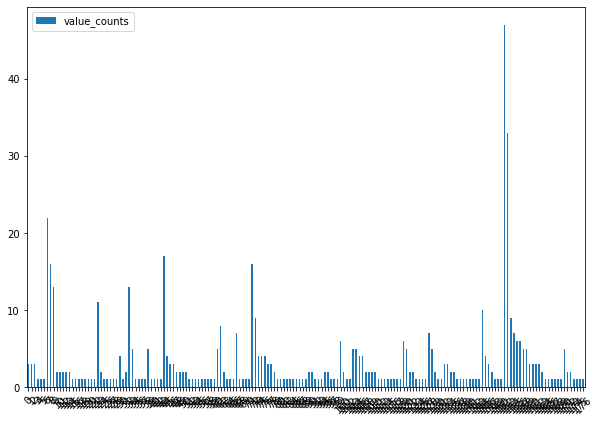

In [9]:
svod[list(filter(lambda x: x == 'value_counts', svod.columns))].plot(kind='bar', rot=45, stacked=True)

In [10]:
pivot_ = svod.pivot_table(index = 'region', columns = 'cuisine', values = 'value_counts', aggfunc = 'count', fill_value = 0)
pivot_.tail()


cuisine,American,Asian,Asian contemporary,Asian influences,Australian,Austrian,Barbecue,Californian,Cantonese,Cantonese Roast Meats,...,Taiwanese,Taizhou,Temple cuisine,Teppanyaki,Thai,Thai Contemporary,Traditional British,Vegetarian,creative,modern
region,,,,,,,,,,,,,,,,,,,,,
Sweden,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Taipei,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Thailand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
United Kingdom,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Washington DC,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


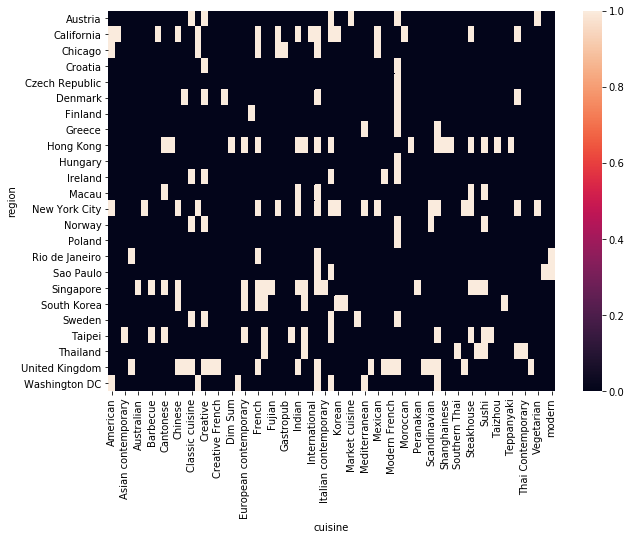

In [12]:
import seaborn as sns
ax = sns.heatmap(pivot_)